# Decision Tree Classification

## Cart: Classification & Regression Trees

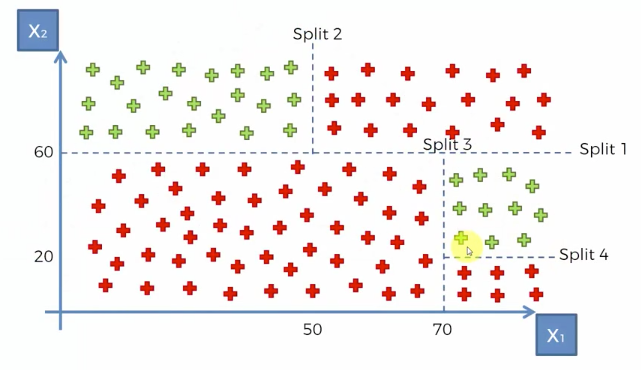

In [5]:
from IPython.display import Image, display
display(Image(filename='split.png', width=600, height=900, embed=True))

<div style="text-align: left"> &copy; SuperDataScience </div>

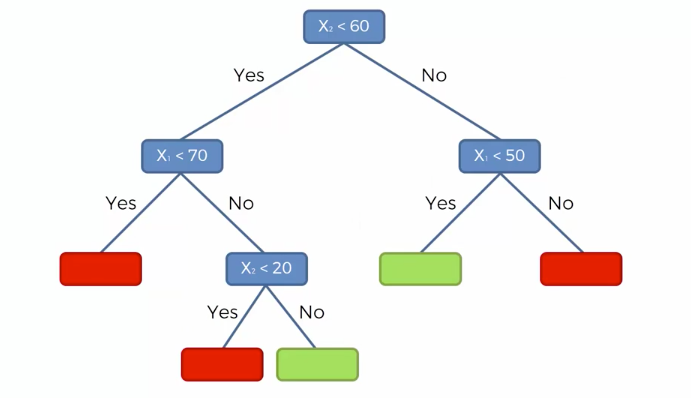

In [6]:
from IPython.display import Image, display
display(Image(filename='tree.png', width=600, height=900, embed=True))

<div style="text-align: left"> &copy; SuperDataScience </div>

### Implementation

In [15]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
print("Dataset columns: " + str(dataset.columns.tolist()))
X = dataset.iloc[:, [2, 3]].values
print("X shape: " + str(X.shape))
y = dataset.iloc[:, 4].values
print("y shape: " + str(y.shape))

Dataset columns: ['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']
X shape: (400, 2)
y shape: (400,)


In [17]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [18]:
# Feature Scaling - NOT necessary because algorithm is not based off Euclidean distance (or similar distance metrics)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
# Fitting Decision Tree classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [20]:
# Predicting the Decision Tree Test set results
y_pred = classifier.predict(X_test)

In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[62,  6],
       [ 3, 29]])

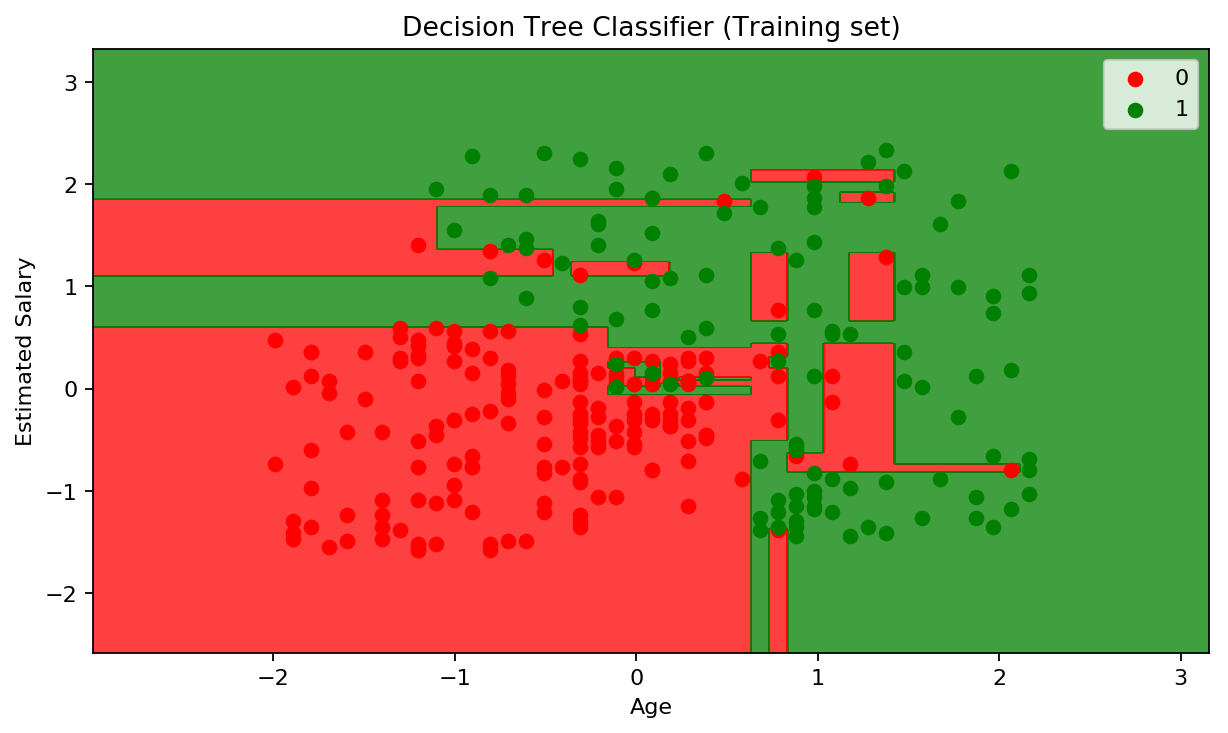

In [22]:
# Visualising the Decision Tree Training set results
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig=plt.figure(figsize=(9, 5), dpi= 80, facecolor='w', edgecolor='k')

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

* Looks like it is trying to capture literally every single training point
* This looks like a sign of overfitting

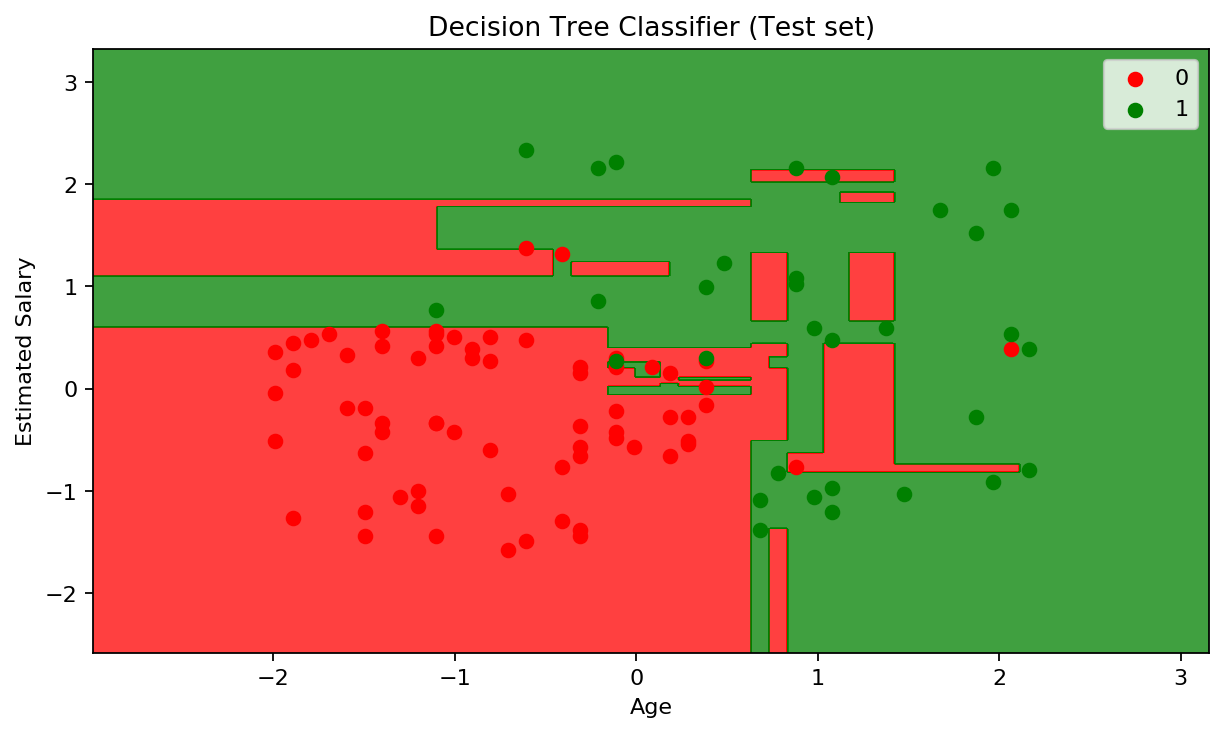

In [23]:
# Visualising the Decision Tree Test set results
fig=plt.figure(figsize=(9, 5), dpi= 80, facecolor='w', edgecolor='k')

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Looks different but not bad!